# 1. Formatting

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import os
import numpy as np

## 1.1 Get All Valid Runs From Sim Folder

In [31]:
# df = pd.read_csv("C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Simulation\\Simulation 1.csv")
df = pd.read_csv("/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Simulation/16.csv")

df = df[df['Catastrophe Point Found?'] == True]

valid_runs = df['Run Number']

## 1.2 Average Every Row For All Valid Files In Window and Output One Summary File Representing Average of All Files

In [32]:
# directory = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Window/16/"
# output_path = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Finale_Window_Summary_Act.csv"

# column_names = [
#     'Window Num', 'Num Data Points in Row', 'Speculator Proportion', 'Market Price',
#     'Excess Demand', 'Kurtosis MP', 'Kurtosis ED', 'Kurtosis SP',
#     'MP Volatility Last 100 Trades', 'MP Volatility Last 10 Trades',
#     'Overall Sim Volatility', 'Pre-CUSP Market Price Difference',
#     'Last 100 Pre-CUSP Market Prices Difference'
# ]

# averaged_data = []

# # Outer loop: Iterate 100 times, once for each row
# for row_index in range(100):
#     row_values = []  

#     for run_number in valid_runs:
#         filename = f'Run {run_number}.csv'
#         file_path = os.path.join(directory, filename)

#         try:
#             run_df = pd.read_csv(file_path)

#             if 'Speculator Proportion' in run_df.columns:
#                 run_df['Speculator Proportion'] = run_df['Speculator Proportion'].str.rstrip('%').astype(float) / 100

#             if row_index < len(run_df):
#                 row_values.append(run_df.iloc[row_index].values)
#             else:
#                 row_values.append([np.nan] * len(column_names))

#         except FileNotFoundError:
#             print(f"File not found: {file_path}")
#             row_values.append([np.nan] * len(column_names))
#     row_average = np.nanmean(row_values, axis=0)
#     averaged_data.append(row_average)
# averaged_df = pd.DataFrame(averaged_data, columns=column_names)
# averaged_df.to_csv(output_path, index=False)

# print(f"Averaged window data saved to {output_path}")


In [45]:
directory = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Window/16/"
output_path = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/test.csv"

# Define column names excluding 'Kurtosis SP'
column_names = [
    'Window Num', 'Num Data Points in Row', 'Speculator Proportion', 'Market Price',
    'Excess Demand', 'Kurtosis MP', 'Kurtosis ED', 
    'MP Volatility Last 100 Trades', 'MP Volatility Last 10 Trades',
    'Overall Sim Volatility', 'Pre-CUSP Market Price Difference',
    'Last 100 Pre-CUSP Market Prices Difference'
]

# Initialize lists to hold averaged and std deviation data
averaged_data = []
std_dev_data = []

# Outer loop: Iterate 100 times, once for each row
for row_index in range(100):
    row_values = []  

    for run_number in valid_runs:
        filename = f'Run {run_number}.csv'
        file_path = os.path.join(directory, filename)

        try:
            run_df = pd.read_csv(file_path)

            if 'Speculator Proportion' in run_df.columns:
                run_df['Speculator Proportion'] = run_df['Speculator Proportion'].str.rstrip('%').astype(float) / 100

            if row_index < len(run_df):
                row_values.append(run_df.iloc[row_index].values)
            else:
                row_values.append([np.nan] * len(column_names))

        except FileNotFoundError:
            print(f"File not found: {file_path}")
            row_values.append([np.nan] * len(column_names))
    
    row_average = np.nanmean(row_values, axis=0)
    row_std_dev = np.nanstd(row_values, axis=0)  # Calculate standard deviation
    
    averaged_data.append(row_average)
    std_dev_data.append(row_std_dev)

# Convert to DataFrame
averaged_df = pd.DataFrame(averaged_data, columns=column_names)
std_dev_df = pd.DataFrame(std_dev_data, columns=column_names)

# Add standard deviation rows to the averaged DataFrame
averaged_df.loc[len(averaged_df)] = ['Standard Deviation'] + [None] + std_dev_df.mean().tolist()[1:]  # Adding a row with 'Standard Deviation'

# Save the averaged data to CSV
averaged_df.to_csv(output_path, index=False)

print(f"Averaged window data saved to {output_path}")


ValueError: 12 columns passed, passed data had 13 columns

In [33]:
# df = pd.read_csv("C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Finale_Window_Summary_Act.csv")
df = pd.read_csv("/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Finale_Window_Summary_Act.csv")
df['Window Num'] = df['Window Num'] + 1
df['Speculator Proportion'] = df['Speculator Proportion'] * 100
df

columns_of_interest = [
    'Speculator Proportion', 'Market Price', 'Excess Demand', 'Kurtosis MP', 
    'Kurtosis ED', 'Kurtosis SP', 'MP Volatility Last 100 Trades', 
    'MP Volatility Last 10 Trades', 'Overall Sim Volatility', 
    'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
]

# 1. Understanding the Data

## 1.1 Data Table

In [34]:
df_1 = df.copy()

df_1.describe()

,Window Num,Num Data Points in Row,Speculator Proportion,Market Price,Excess Demand,Kurtosis MP,Kurtosis ED,Kurtosis SP,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Overall Sim Volatility,Pre-CUSP Market Price Difference,Last 100 Pre-CUSP Market Prices Difference
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,616.120598,64.473031,76.485691,-197.989691,-0.452036,-0.476237,1.565137,3.233103,1.788533,4.380322,33.741295,17.168496
std,29.011492,0.000000,0.285787,13.197925,144.312433,0.196900,0.084564,0.983024,2.085953,1.174171,2.302160,2.610246,3.603061
min,1.000000,616.120598,64.000000,54.252391,-451.372465,-0.606185,-0.610455,0.000000,1.163470,0.812763,1.706121,28.630416,11.689221
25%,25.750000,616.120598,64.229007,65.826846,-323.664888,-0.544522,-0.535606,0.920744,1.589506,1.078348,2.475934,31.629656,14.473266
50%,50.500000,616.120598,64.472828,74.306019,-185.737994,-0.514363,-0.503290,1.399097,2.421864,1.350255,3.695615,34.475774,16.894344
75%,75.250000,616.120598,64.716873,88.166841,-64.400747,-0.450116,-0.417521,1.921180,4.490614,2.176333,6.028421,35.596038,19.490275
max,100.000000,616.120598,64.960256,102.624621,-1.935966,0.470074,-0.228231,4.709860,10.316779,6.918194,11.154656,41.544557,26.591089


# 1.2 Boxplot of Attributes

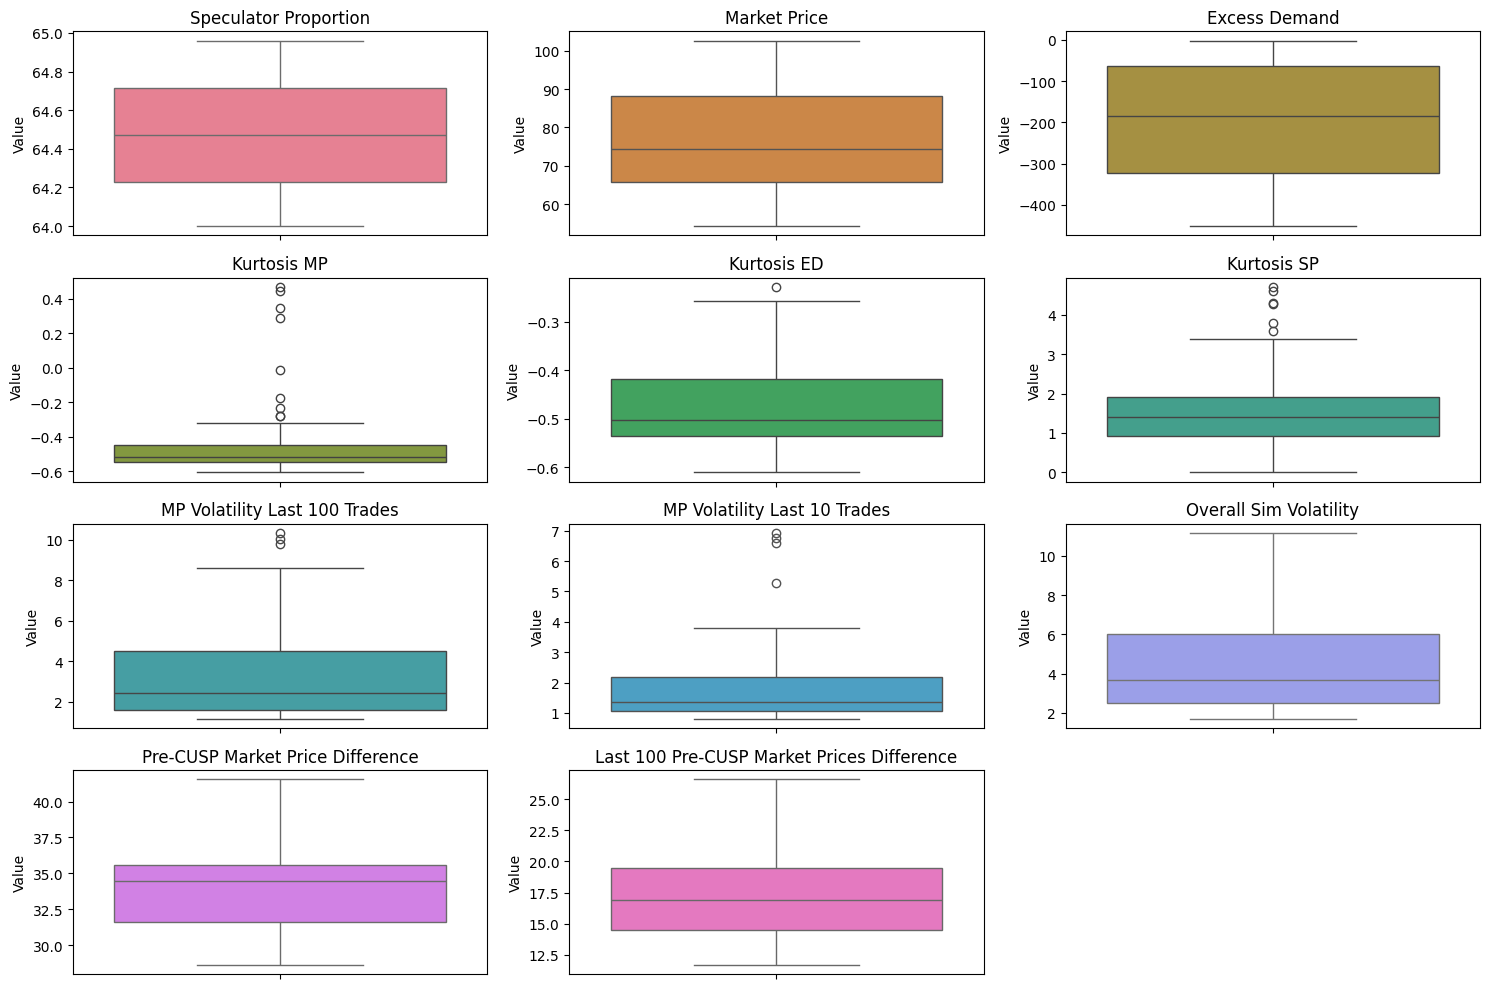

In [35]:
colors = sns.color_palette('husl', len(columns_of_interest)) 

n_cols = 3  
n_rows = (len(columns_of_interest) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10)) 
axes = axes.flatten()  

for i, column in enumerate(columns_of_interest):
    sns.boxplot(data=df, y=column, ax=axes[i], color=colors[i])  
    axes[i].set_title(column) 
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('Value')  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 1.3 Correlation Matrix

In [46]:
df_2 = df.copy()
corr_cols = [
    'Market Price', 'Excess Demand', 'Kurtosis MP', 
    'Kurtosis ED', 'MP Volatility Last 100 Trades', 
    'MP Volatility Last 10 Trades', 'Overall Sim Volatility', 
    'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
]

# df_2 = df_2[columns_of_interest]
df_2 = df_2[corr_cols]
corr_matrix = df_2.corr()
corr_matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(
#     corr_matrix, 
#     annot=True, 
#     cmap='viridis', 
#     center=0, 
#     linewidths=0.3, 
#     cbar_kws={"shrink": 0.8, "aspect": 30},  
#     annot_kws={"size": 10}, 
# )
# plt.title('Correlation Matrix Heatmap', fontsize=18, weight='bold', pad=15)
# plt.xticks(rotation=45, ha='right') 
# plt.yticks(rotation=0) 
# plt.tight_layout()
# plt.show()

,Market Price,Excess Demand,Kurtosis MP,Kurtosis ED,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Overall Sim Volatility,Pre-CUSP Market Price Difference,Last 100 Pre-CUSP Market Prices Difference
Market Price,1.000000,0.981743,0.533812,0.878236,0.928297,0.792832,0.963327,0.613469,0.966001
Excess Demand,0.981743,1.000000,0.398297,0.801960,0.857944,0.700086,0.909202,0.673562,0.941507
Kurtosis MP,0.533812,0.398297,1.000000,0.721144,0.782132,0.900382,0.719802,0.375818,0.645785
Kurtosis ED,0.878236,0.801960,0.721144,1.000000,0.921017,0.853246,0.920401,0.457093,0.888337
MP Volatility Last 100 Trades,0.928297,0.857944,0.782132,0.921017,1.000000,0.950361,0.990372,0.561249,0.951490
MP Volatility Last 10 Trades,0.792832,0.700086,0.900382,0.853246,0.950361,1.000000,0.913614,0.562609,0.864471
Overall Sim Volatility,0.963327,0.909202,0.719802,0.920401,0.990372,0.913614,1.000000,0.590594,0.972268
Pre-CUSP Market Price Difference,0.613469,0.673562,0.375818,0.457093,0.561249,0.562609,0.590594,1.000000,0.720232
Last 100 Pre-CUSP Market Prices Difference,0.966001,0.941507,0.645785,0.888337,0.951490,0.864471,0.972268,0.720232,1.000000


# 2. Speculator Proportion Analysis Time

## 2.1 Market Price

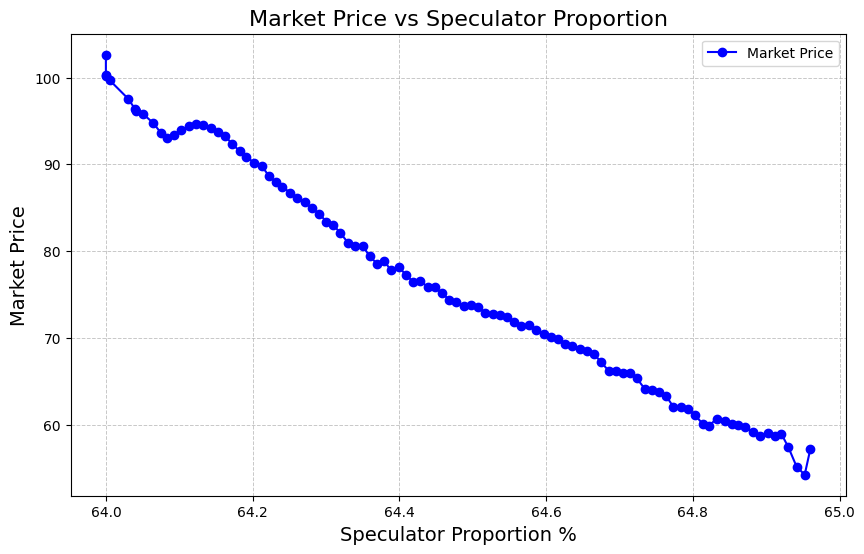

In [37]:
df_3 = df.copy()

plt.figure(figsize=(10, 6))
plt.plot(df_3['Speculator Proportion'], df_3['Market Price'], marker='o', color='b', linestyle='-', label='Market Price')

plt.xlabel('Speculator Proportion %', fontsize=14)
plt.ylabel('Market Price', fontsize=14)
plt.title('Market Price vs Speculator Proportion', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

plt.show()


## 2.2 Excess Demand

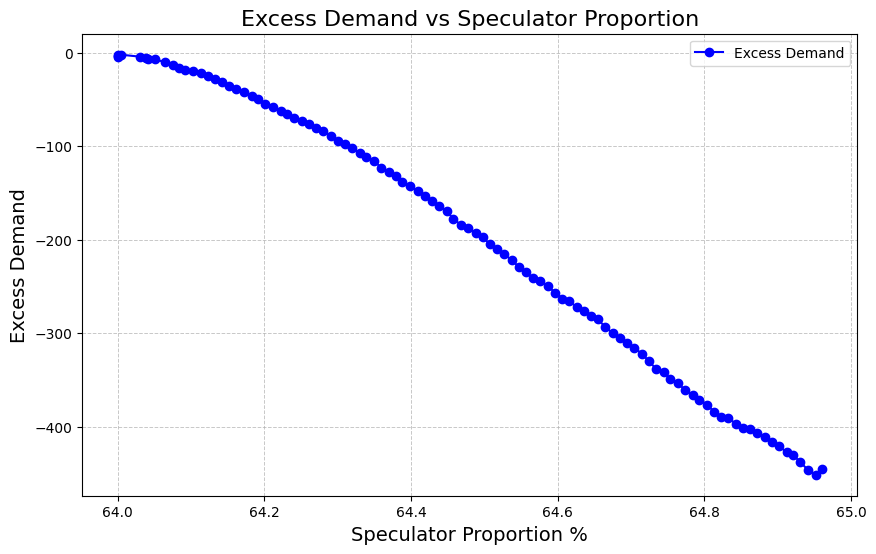

In [38]:
df_4 = df.copy()

plt.figure(figsize=(10, 6))
plt.plot(df_4['Speculator Proportion'], df_4['Excess Demand'], marker='o', color='b', linestyle='-', label='Excess Demand')

plt.xlabel('Speculator Proportion %', fontsize=14)
plt.ylabel('Excess Demand', fontsize=14)
plt.title('Excess Demand vs Speculator Proportion', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

plt.show()


## 2.3 Kurtosis Market Price and Excess Demand

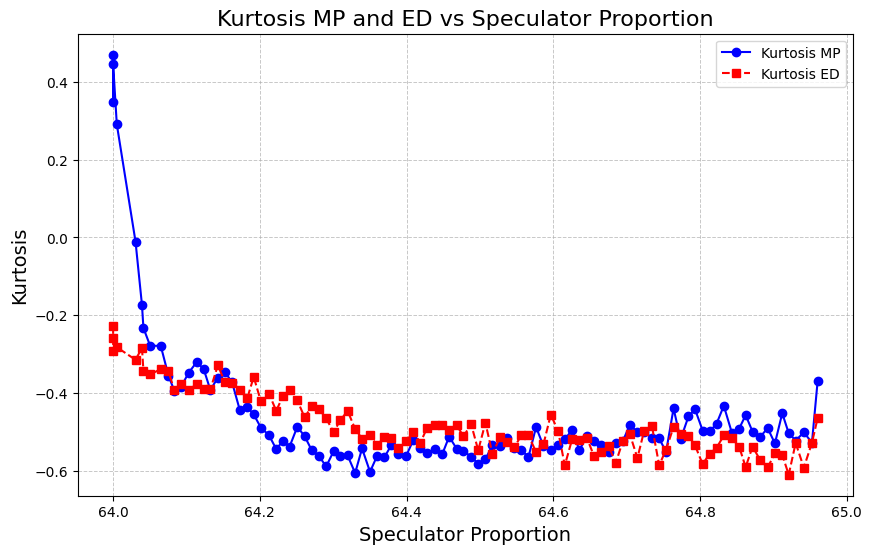

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(
    df['Speculator Proportion'], df['Kurtosis MP'], 
    marker='o', linestyle='-', color='b', label='Kurtosis MP'
)

plt.plot(
    df['Speculator Proportion'], df['Kurtosis ED'], 
    marker='s', linestyle='--', color='r', label='Kurtosis ED'
)

plt.xlabel('Speculator Proportion', fontsize=14)
plt.ylabel('Kurtosis', fontsize=14)
plt.title('Kurtosis MP and ED vs Speculator Proportion', fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

plt.show()

## 2.4 Volatility (Overall, Last 100 Trades, Last 10 Trades)

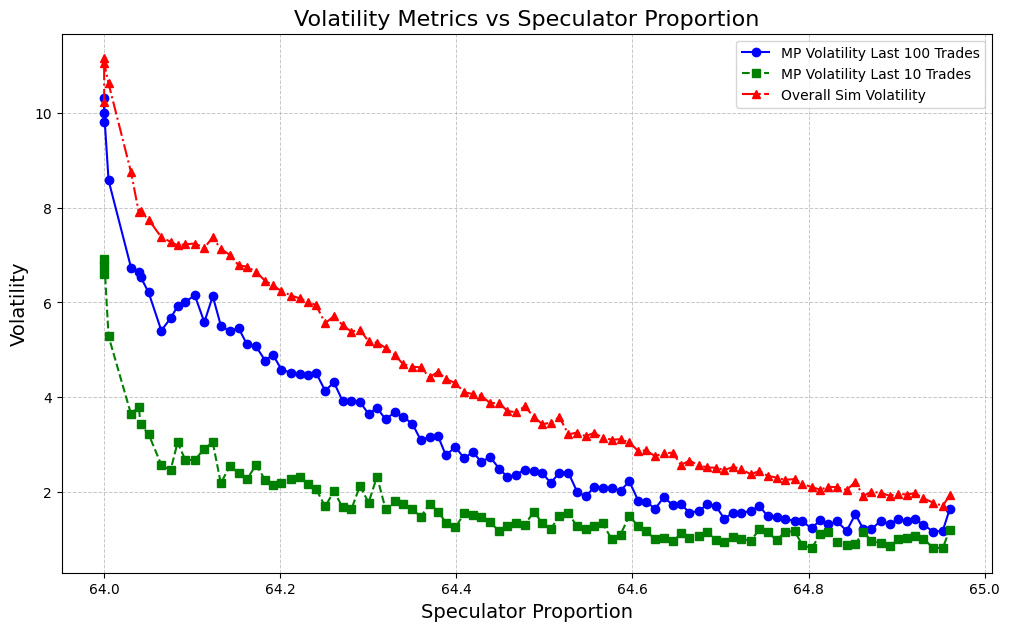

In [40]:
plt.figure(figsize=(12, 7))

plt.plot(
    df['Speculator Proportion'], df['MP Volatility Last 100 Trades'], 
    marker='o', linestyle='-', color='b', label='MP Volatility Last 100 Trades'
)

plt.plot(
    df['Speculator Proportion'], df['MP Volatility Last 10 Trades'], 
    marker='s', linestyle='--', color='g', label='MP Volatility Last 10 Trades'
)

plt.plot(
    df['Speculator Proportion'], df['Overall Sim Volatility'], 
    marker='^', linestyle='-.', color='r', label='Overall Sim Volatility'
)

plt.xlabel('Speculator Proportion', fontsize=14)
plt.ylabel('Volatility', fontsize=14)
plt.title('Volatility Metrics vs Speculator Proportion', fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()


## 2.5 Market Price Difference (Last 100 Trades, Last Trade)

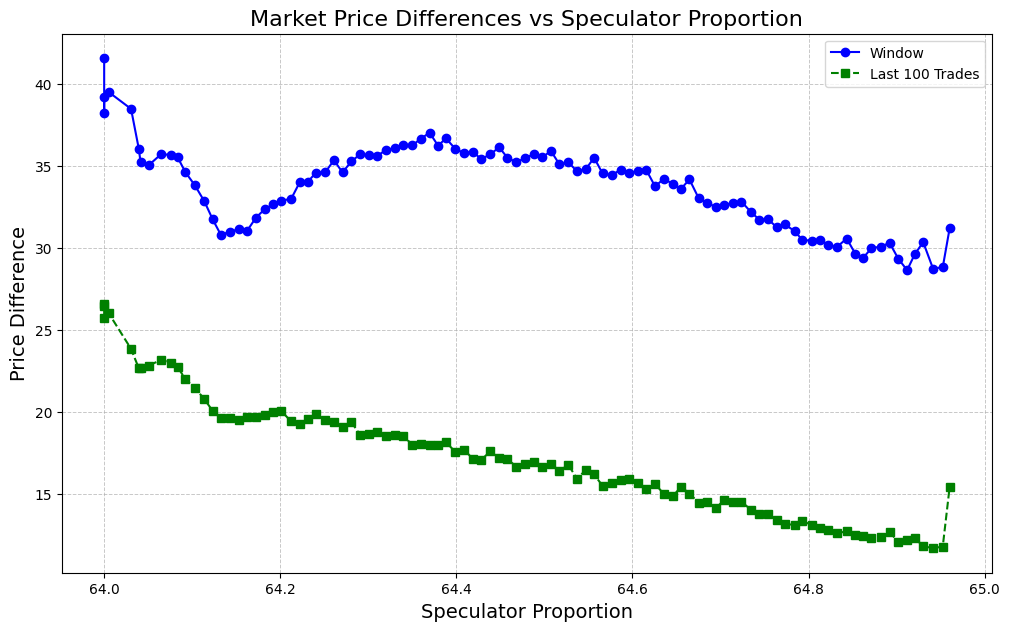

In [41]:
plt.figure(figsize=(12, 7))
plt.plot(
    df['Speculator Proportion'], df['Pre-CUSP Market Price Difference'], 
    marker='o', linestyle='-', color='b', label='Window'
)

plt.plot(
    df['Speculator Proportion'], df['Last 100 Pre-CUSP Market Prices Difference'], 
    marker='s', linestyle='--', color='g', label='Last 100 Trades'
)

plt.xlabel('Speculator Proportion', fontsize=14)
plt.ylabel('Price Difference', fontsize=14)
plt.title('Market Price Differences vs Speculator Proportion', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

plt.show()


# 3. Adhoc

## 3.1 Histogram Excess Demand

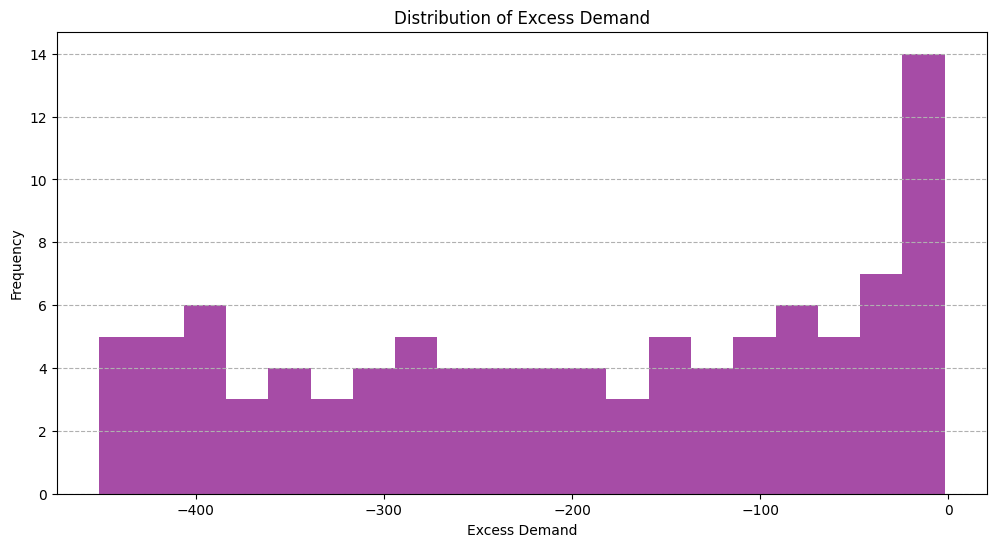

In [42]:
plt.figure(figsize=(12, 6))
plt.hist(df['Excess Demand'], bins=20, color='purple', alpha=0.7)
plt.xlabel('Excess Demand')
plt.ylabel('Frequency')
plt.title('Distribution of Excess Demand')
plt.grid(axis='y', linestyle='--')
plt.show()

## 3.2 Volatility (Overall, Last 100 Trades, Last 10 Trades)

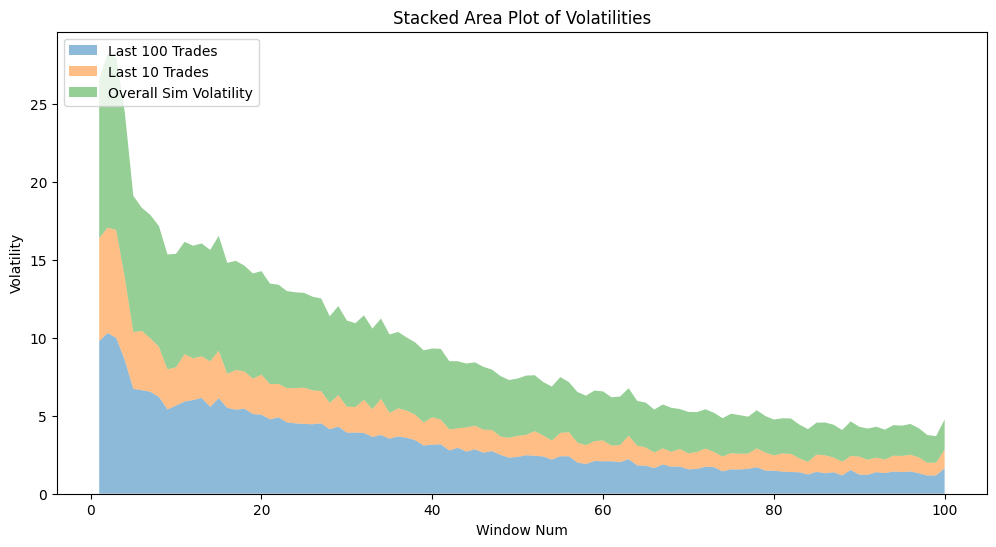

In [43]:
plt.figure(figsize=(12, 6))
plt.stackplot(df['Window Num'], 
              df['MP Volatility Last 100 Trades'], 
              df['MP Volatility Last 10 Trades'], 
              df['Overall Sim Volatility'], 
              labels=['Last 100 Trades', 'Last 10 Trades', 'Overall Sim Volatility'],
              alpha=0.5)

plt.xlabel('Window Num')
plt.ylabel('Volatility')
plt.title('Stacked Area Plot of Volatilities')
plt.legend(loc='upper left')
plt.show()


## 3.3 Bifurcation Row

In [44]:
last_row = df.iloc[-1]
last_row

Window Num                                    100.000000
Num Data Points in Row                        616.120598
Speculator Proportion                          64.960256
Market Price                                   57.258292
Excess Demand                                -444.980790
Kurtosis MP                                    -0.368409
Kurtosis ED                                    -0.464330
Kurtosis SP                                     0.568531
MP Volatility Last 100 Trades                   1.632443
MP Volatility Last 10 Trades                    1.198563
Overall Sim Volatility                          1.929051
Pre-CUSP Market Price Difference               31.176361
Last 100 Pre-CUSP Market Prices Difference     15.411473
Name: 99, dtype: float64